# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.0 MB/s eta 0:00:00


In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import pandas as pd

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')


3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [ ]:
cursor=con.cursor()

sql="""
select MAX(hire_date), MIN(hire_date) FROM employees
"""
cursor.execute(sql)

cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [5]:
from IPython.display import display

cursor=con.cursor()

query = """SELECT emp_no, salary, from_date, to_date
           FROM salaries s1
           WHERE to_date = (SELECT MAX(to_date)
                 FROM salaries s2
                 WHERE s1.emp_no = s2.emp_no)
                """
cursor.execute(query)
rows = cursor.fetchall()

field_names = [i[0] for i in cursor.description]# Отримання назв колонок
res=pd.DataFrame(rows, columns=field_names)# Запис результатів у DataFrame

display(res.columns)# Виведення назв колонок
display("DataFrame size:",res.shape)# Виведення розміру DataFrame
display(res.head(3))# Виведення перших 3 записів




Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

'DataFrame size:'

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [7]:
res['to_date'].dtype

to_date_9999_01_01 = (res['to_date'] == '9999-01-01').sum()
not_to_date_9999_01_01 = (res['to_date'] != '9999-01-01').sum()

display("Кількість значень to_date рівних 9999-01-01", to_date_9999_01_01)
display("Кількість значень to_date рівних 9999-01-01", not_to_date_9999_01_01)

dtype('O')

'Кількість значень to_date рівних 9999-01-01'

0

'Кількість значень to_date рівних 9999-01-01'

300180

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [8]:
import matplotlib.pyplot as plt

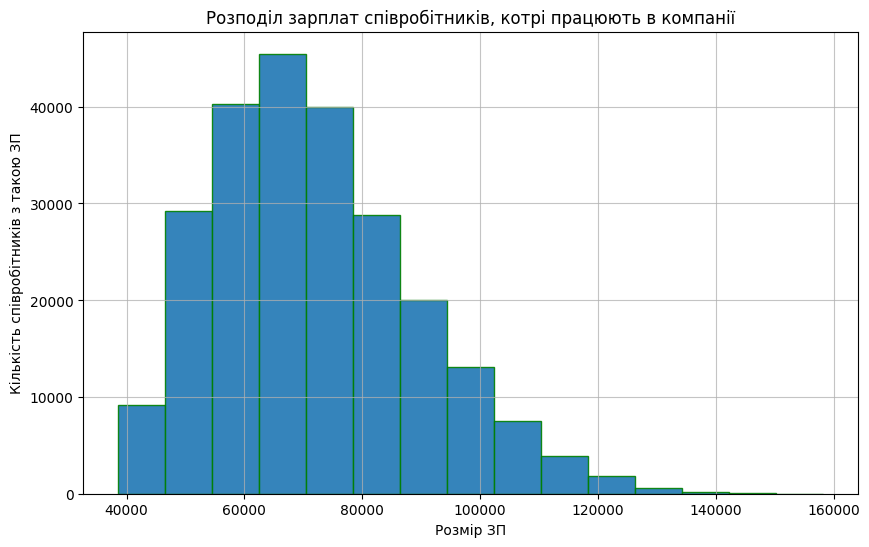

In [35]:
res['to_date'] = res['to_date'].astype(str)

employee = res[res['to_date'] == '9999-01-01']

plt.figure(figsize=(10, 6))
plt.hist(employee['salary'], bins=15, edgecolor='g', alpha=0.9)# Дозволив собі дещо кастомізувати графік, використуваючи знання з попередніх завдань
plt.title('Розподіл зарплат співробітників, котрі працюють в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП')
plt.grid(alpha=0.75)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [36]:
con.close()